## Convolutional Neural Network

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

mnist_bldr = tfds.builder('mnist')
mnist_bldr.download_and_prepare()
datasets = mnist_bldr.as_dataset(shuffle_files=False)

mnist_train_orig = datasets['train']
mnist_test_orig = datasets['test']

In [2]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
NUM_EPOCHS = 20

mnist_train = mnist_train_orig.map(
    lambda item: (
        tf.cast(item['image'], tf.float32) / 255.0,
        tf.cast(item['label'], tf.int32)
    )
)

mnist_test = mnist_test_orig.map(
    lambda item: (
        tf.cast(item['image'], tf.float32) / 255.0,
        tf.cast(item['label'], tf.int32)
    )
)

tf.random.set_seed(1)

mnist_train = mnist_train.shuffle(buffer_size=BUFFER_SIZE, reshuffle_each_iteration=False)

mnist_valid = mnist_train.take(10000).batch(BATCH_SIZE)
mnist_train = mnist_train.skip(10000).batch(BATCH_SIZE)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [3]:
mnist_train_orig

<_OptionsDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>

In [4]:
model = tf.keras.Sequential()
model.add(
    tf.keras.layers.Conv2D(
        filters=32,
        kernel_size=(5, 5),
        strides=(1, 1),
        padding='same',
        data_format='channels_last',
        name='conv_1',
        activation='relu'
    )
)
model.add(
    tf.keras.layers.MaxPool2D(
        pool_size=(2, 2),
        name='pool_1'
    )
)
model.add(
    tf.keras.layers.Conv2D(
        filters=64,
        kernel_size=(5, 5),
        strides=(1, 1),
        padding='same',
        data_format='channels_last',
        name='conv_2',
        activation='relu'
    )
)
model.add(
    tf.keras.layers.MaxPool2D(
        pool_size=(2, 2),
        name='pool_2'
    )
)

In [5]:
model.compute_output_shape(input_shape=(16, 28, 28, 1))

TensorShape([16, 7, 7, 64])

In [6]:
model.add(tf.keras.layers.Flatten())
model.compute_output_shape(input_shape=(16, 28, 28, 1))

TensorShape([16, 3136])

In [7]:
model.add(tf.keras.layers.Dense(units=1024, name='fc_1', activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=10, name='fc_2', activation='softmax'))

In [8]:
tf.random.set_seed(1)

model.build(input_shape=(None, 28, 28, 1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 14, 14, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 14, 14, 64)        51264     
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
fc_1 (Dense)                 (None, 1024)              3212288   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [10]:
history = model.fit(
    mnist_train,
    epochs=NUM_EPOCHS,
    validation_data=mnist_valid,
    shuffle=True
)

Epoch 1/20
782/782 [==============================] - 69s 88ms/step - loss: 0.1461 - accuracy: 0.9547 - val_loss: 0.0518 - val_accuracy: 0.9832
Epoch 2/20
782/782 [==============================] - 69s 88ms/step - loss: 0.0453 - accuracy: 0.9857 - val_loss: 0.0358 - val_accuracy: 0.9880
Epoch 3/20
782/782 [==============================] - 71s 90ms/step - loss: 0.0308 - accuracy: 0.9897 - val_loss: 0.0436 - val_accuracy: 0.9871
Epoch 4/20
782/782 [==============================] - 72s 93ms/step - loss: 0.0235 - accuracy: 0.9926 - val_loss: 0.0354 - val_accuracy: 0.9891
Epoch 5/20
782/782 [==============================] - 71s 91ms/step - loss: 0.0184 - accuracy: 0.9939 - val_loss: 0.0596 - val_accuracy: 0.9843
Epoch 6/20
782/782 [==============================] - 68s 88ms/step - loss: 0.0156 - accuracy: 0.9949 - val_loss: 0.0450 - val_accuracy: 0.9898
Epoch 7/20
782/782 [==============================] - 69s 89ms/step - loss: 0.0122 - accuracy: 0.9959 - val_loss: 0.0395 - val_accuracy:

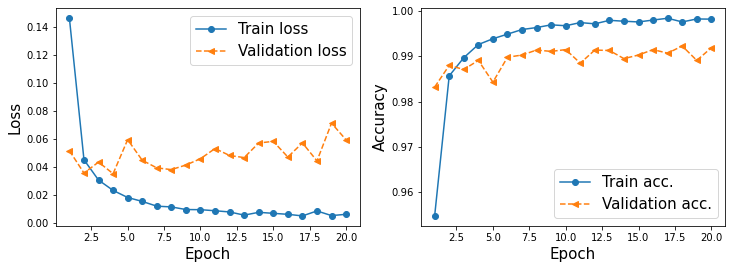

In [12]:
import matplotlib.pyplot as plt
import numpy as np

hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

plt.show()

In [15]:
test_results = model.evaluate(mnist_test.batch(20))

500/500 [==============================] - 5s 10ms/step - loss: 0.0376 - accuracy: 0.9931


In [18]:
print(f'Test Acc. {test_results[1] * 100:.2f}%')

Test Acc. 99.31%


In [35]:
celeba_bldr = tfds.builder('celeb_a')
celeba_bldr.download_and_prepare()
celeba = celeba_bldr.as_dataset(shuffle_files=False)
print(celeba.keys())

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

C:\Users\MASA\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'drive.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\MASA\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'drive.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


NonMatchingChecksumError: Artifact https://drive.google.com/uc?export=download&id=0B7EVK8r0v71pZjFTYXZWM3FlRnM, downloaded to C:\Users\MASA\tensorflow_datasets\downloads\ucexport_download_id_0B7EVK8r0v71pZjFTYXZWM3FlDDaXUAQO8EGH_a7VqGNLRtW52mva1LzDrb-V723OQN8.tmp.e40e9abc19704cdba4239de94774c618\uc, has wrong checksum.